In [1]:
import sys  # noqa: E402
sys.path.append("../")
import pybats
import matplotlib.dates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Hack import load
from Hack.rl import get_expected_price as get_ep
from pybats.loss_functions import MAPE
from pybats.analysis import analysis
from pybats.point_forecast import median
from pybats.plot import *
from datetime import datetime,date
from Forecasting import Bayesian_Forecast



In [2]:
# Load the data
epex = load.epex().load()



In [3]:
#Obtain the foreacsted samples and data 
datetimes,prices,samples,forecast = Bayesian_Forecast.evaluate(epex)


In [57]:
plot_start = 45500 #Offset from the start date at which to begin the plot
plot_length = 500
horizon = 6

plot_start_date = datetimes[0] + pd.DateOffset(hours=(horizon + plot_start)/2.)
plot_end_date   = plot_start_date + pd.DateOffset(hours=(plot_length - 1)/2.)


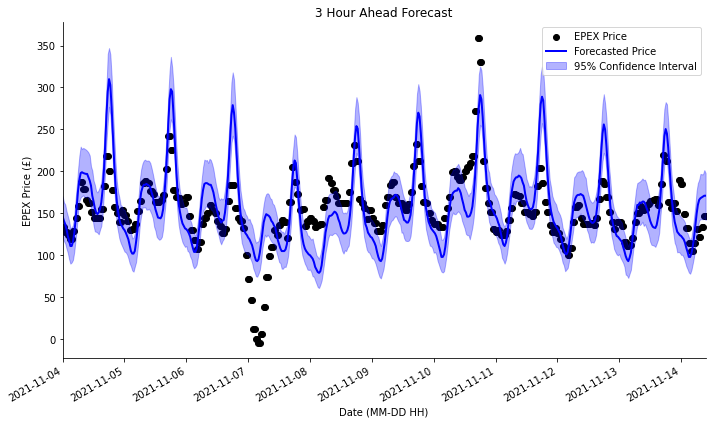

In [59]:
fig, ax = plt.subplots(figsize=(10,6))
ax = Bayesian_Forecast.plot_forecast(
    fig, ax,
    dates=epex.loc[plot_start_date:plot_end_date].index,
    f=forecast[plot_start:plot_start+plot_length,horizon-1],
    samples=samples[:,plot_start:plot_start+plot_length,horizon-1],
    y=epex.loc[plot_start_date:plot_end_date].values[:,0],
    linewidth = 2,
    credible_interval=95)

ax = Bayesian_Forecast.forecast_ax_style(ax=ax,
    ylabel='EPEX Price (£)',
    xlabel='Date (MM-DD HH)',
    title='3 Hour Ahead Forecast',
    legend=['EPEX Price','Forecasted Price','95% Confidence Interval']
    )